# Sklearn

## sklearn.ensemble.RandomForestClassifier

документация:  http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/thomas/anaconda2/envs/env_py2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
from sklearn import ensemble, model_selection, metrics 
from sklearn.model_selection import learning_curve
import numpy as np
import pandas as pd

### Данные

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets

(1797, 64)


<Figure size 432x288 with 0 Axes>

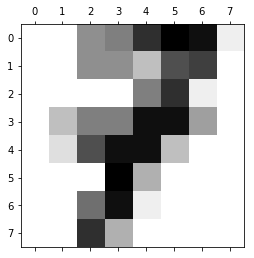

In [9]:
# вызываем функцию load_digits из библиотеки sklearn.datasets
from sklearn.datasets import load_digits
# создаем объект класса load_digits() 
digits = load_digits()
# сморим размер выборки
print(digits.data.shape)
# для вызова изображения из датасета импортируем matplotlib.pyplot
import matplotlib.pyplot as plt 
# зададим изображать рисунок в оттенках серого 
plt.gray() 
# если нужно вызвать изображение в негативе то в plt.matshow отправляем параметр cmap='gray_r'  
plt.matshow(digits.images[7], cmap='gray_r') 
plt.show() 

подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

In [10]:
# данные в сете организованы по принципу ключ:значение. вызываем список ключей 
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


In [11]:
# вызываем признак 'data'
X = digits['data']
# исследуем признак. очевидно он представляет из себя вектор где каждый элемент это
# оттенок серого
print X[0]
# вызываем целевое значение 'target'
y = digits['target']
# исследуем целевое значение. очеквидно что это цифра и нам предстоит решать задачу 
# классификации
print y[0]

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [12]:
# вызываем класс решающих деревьев DecisionTreeClassifier и создаем объект этого класса 
from sklearn.tree import DecisionTreeClassifier
decision_tree_estimator = DecisionTreeClassifier()
# вызываем функцию cross_val_score которая оценивает качество методом перекресной проверки
from sklearn.model_selection import cross_val_score
# передаем в функцию аргументы - матрицу признаков и вектор целевых значений, отдельно 
# указывем, что выборку нужно разбить на 10 фолдов (обычно достаточно 5). берем (по условию)
# среднее значение
CVS_for_decision_tree = cross_val_score(decision_tree_estimator, X, y, cv=10).mean()
print 'CVS_for_decision_tree', CVS_for_decision_tree
# Качество работы одного решающего дерева обычно получается не очень высоким, 
# но на этом датасете получилось неплохо. Обратите внимание - дерево вполне могло получиться
# сильно переобученным, ведь мы не ограничивали его глубину

CVS_for_decision_tree 0.8270130401451314


In [13]:
def write_answer_1(CVS):
    with open("random_forest_answer1.txt", "w") as result:
        result.write(str(CVS))
write_answer_1(CVS_for_decision_tree)

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [15]:
# Бэггинг - это технология классификации, использующая композиции алгоритмов, каждый из 
# которых обучается независимо. Результат классификации определяется путем голосования. 
# Бэггинг позволяет снизить процент ошибки классификации в случае, когда высока дисперсия 
# ошибки базового метода. 
# вызываем класс BaggingClassifier и создаем объект этого класса
from sklearn.ensemble import BaggingClassifier
# создаем объект класса BaggingClassifier. отдельно указываем количество деревьев == 100
bagging_classifier = BaggingClassifier(n_estimators = 100)
# усредняем оценку качества перекрестной проверки на 10 фолдах
CVS_for_bagging_classifier = cross_val_score(bagging_classifier, X, y, cv=10).mean()
print 'CVS_for_bagging_classifier', CVS_for_bagging_classifier
# Деревья неустойчивы к изменениям в обучающей выборке, поэтому в результате усреднения 
# по деревьям, построенным на немного разных выборках (как это происходит в бэггинге), 
# получается более точный ответ.

CVS_for_bagging_classifier 0.923261574839


In [16]:
def write_answer_2(CVS):
    with open("random_forest_answer2.txt", "w") as result:
        result.write(str(CVS))
write_answer_2(CVS_for_bagging_classifier)

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на sqrt(d) случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.


In [46]:
from math import sqrt
# получаем требуемое значение - корень квадратный от количества признаков в выборке
features_sqrt = int(sqrt(X.shape[0]))
# создаем объект класса BaggingClassifier. отдельно указываем количество случайно взятых
# признаков max_features = features_sqrt
bagging_classifier_by_sqrd_features = BaggingClassifier(n_estimators = 100, max_features = features_sqrt)
CVS_for_bagging_classifier_by_sqrd_features = cross_val_score(bagging_classifier_by_sqrd_features, X, y, cv=10).mean()
print 'CVS_for_bagging_classifier_by_sqrd_features', CVS_for_bagging_classifier_by_sqrd_features
# С добавлением выбора случайных признаков деревья стали различаться еще больше, 
# в результате композиция работает лучше.

CVS_for_bagging_classifier_by_sqrd_features 0.9476926766648163


In [47]:
def write_answer_3(CVS):
    with open("random_forest_answer3.txt", "w") as result:
        result.write(str(CVS))
write_answer_3(CVS_for_bagging_classifier_by_sqrd_features)

Выбрать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Для этого убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn. Выбирать sqrt(d) признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [55]:
# создаем объект класса DecisionTreeClassifier. отдельно указываем количество признаков - features_sqrt 
DTE_by_sqrt_f = DecisionTreeClassifier(max_features = features_sqrt)
# передаем объект в качестве аргумента в бэггинг классификатор
bagging_classifier_by_DTE_sqrd_f = BaggingClassifier(DTE_by_sqrt_f, n_estimators = 100)
# измеряем качество. усредняем оценку качества перекрестной проверки на 10 фолдах
CVS_for_DT_by_features_sqrt = cross_val_score(bagging_classifier_by_DTE_sqrd_f, X, y, cv=10).mean()
print 'CVS_for_DT_by_features_sqrt', CVS_for_DT_by_features_sqrt
# Если выбирать случайные признаки в каждой вершине, отличия между деревьями становятся 
# еще более существенными, что хорошо сказывается на качестве работы композиции. 
# Именно так и устроен случайный лес.

CVS_for_DT_by_features_sqrt 0.9427126837536258


In [52]:
def write_answer_4(CVS):
    with open("random_forest_answer4.txt", "w") as result:
        result.write(str(CVS))
write_answer_4(CVS_for_decision_tree__by_features_sqrt)

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

In [59]:
from sklearn.ensemble import RandomForestClassifier
# создаем цикл в котором на каждой итерации меняем количество деревьев для классификатора
# класса RandomForestClassifier. полученные значения записываем
trees = [5, 10, 15, 50, 100]
CVS = []
for tree in trees:
    rf_classifier = RandomForestClassifier(n_estimators = tree, max_depth = 10, random_state = 1)
    CVS_for_rf_classifier = cross_val_score(rf_classifier, X, y, cv=10).mean()
    CVS.append(CVS_for_rf_classifier)
    print 'CVS_for_rf_classifier, trees:', tree, CVS_for_rf_classifier

CVS_for_rf_classifier, trees: 5 0.8949058292080501
CVS_for_rf_classifier, trees: 10 0.9305333909763152
CVS_for_rf_classifier, trees: 15 0.9321788606479539
CVS_for_rf_classifier, trees: 50 0.9494534874161682
CVS_for_rf_classifier, trees: 100 0.9499538975818241


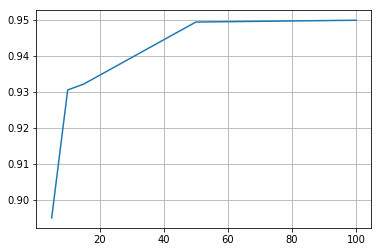

In [63]:
pylab.grid(True)
pylab.plot(trees, CVS)
# наблюдаем, что с ростом количества деревьев до 50 растет качество классификатора
# потом качество стабилизируется

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.



In [69]:
# создаем цикл в котором на каждой итерации меняем количество признаков в вершинах для классификатора
# класса RandomForestClassifier. полученные значения записываем
features = [5, 10, 40, 50, 60]
CVS = []
for feature in features:
    rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10, max_features = feature, random_state = 1)
    CVS_for_rf_classifier = cross_val_score(rf_classifier, X, y, cv=10).mean()
    CVS.append(CVS_for_rf_classifier)
    print 'CVS_for_rf_classifier, features:', feature, CVS_for_rf_classifier

CVS_for_rf_classifier, features: 5 0.947857960801082
CVS_for_rf_classifier, features: 10 0.9505729427877379
CVS_for_rf_classifier, features: 40 0.9399130307170525
CVS_for_rf_classifier, features: 50 0.9321654247256177
CVS_for_rf_classifier, features: 60 0.9254405869883632


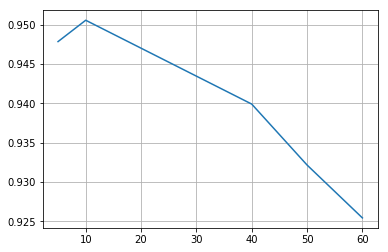

In [70]:
pylab.grid(True)
pylab.plot(features, CVS)
# наблюдаем, что с ростом гколичества признаков в вершинах деревьев качество классификатора
# ухудшается

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).


In [66]:
# создаем цикл в котором на каждой итерации меняем глубину деревьев для классификатора
# класса RandomForestClassifier. полученные значения записываем
depths = [5, 10, 50, 100]
CVS = []
for depth in depths:
    rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = depth, random_state = 1)
    CVS_for_rf_classifier = cross_val_score(rf_classifier, X, y, cv=10).mean()
    CVS.append(CVS_for_rf_classifier)
    print 'CVS_for_rf_classifier, depth:', depth, CVS_for_rf_classifier

CVS_for_rf_classifier, depth: 5 0.9131637566499888
CVS_for_rf_classifier, depth: 10 0.9499538975818241
CVS_for_rf_classifier, depth: 50 0.9572130012266203
CVS_for_rf_classifier, depth: 100 0.9572130012266203


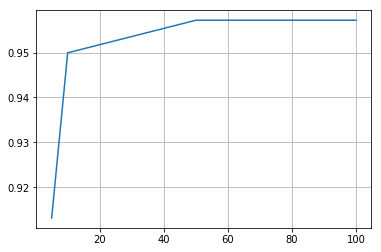

In [67]:
pylab.grid(True)
pylab.plot(depths, CVS)
# наблюдаем, что с ростом глубины деревьев качество классификатора
# улучшается а потом стабилизируется

In [71]:
with open("random_forest_answer5.txt", "w") as result:
    result.write(str('2 3 4 7'))

In [ ]:
# 